In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models


In [4]:

# Load the dataset
data = pd.read_csv('housing_prices.csv')


In [5]:
# Preprocess the data
X = data.drop('Price', axis=1)
y = data['Price']


In [6]:

# One-hot encode the 'Location' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Bedrooms', 'Bathrooms', 'SquareFootage', 'Age']),
        ('cat', OneHotEncoder(), ['Location'])
    ])

X = preprocessor.fit_transform(X)



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# Build the feedforward neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Output layer


In [10]:

# Compile the model
model.compile(optimizer='adam', loss='mse')



In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 108099829760.0000 - val_loss: 228049551360.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 108099788800.0000 - val_loss: 228049453056.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 108099739648.0000 - val_loss: 228049371136.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 108099706880.0000 - val_loss: 228049289216.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 108099657728.0000 - val_loss: 228049190912.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 108099624960.0000 - val_loss: 228049108992.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 108099592192.0000 - val_loss: 228048994304.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 108099543040.0000 - val_loss: 228048896000.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 108099493888.0000 - val_loss: 228048797696.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Mean Squared Error: 96181795590.10251


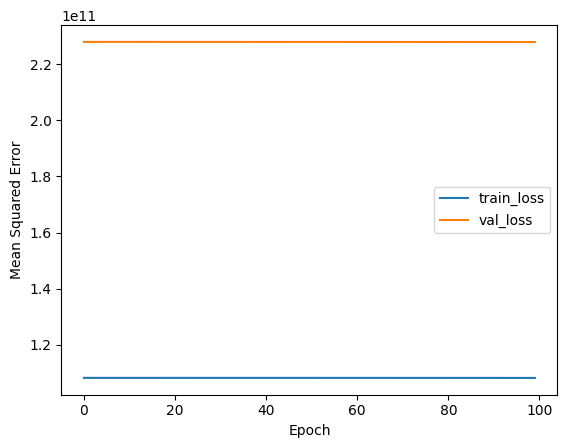

In [13]:

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()